In [1]:
import matplotlib.pyplot as plt

import numpy as np

In [4]:
outputs = []
for k in [0, 1, 2, 3]:
    output = np.load(f'../../../logs/probe_tacotron2_articulatory_features/scores/probe_layer_{k}.npz')
    outputs.append(dict(output))

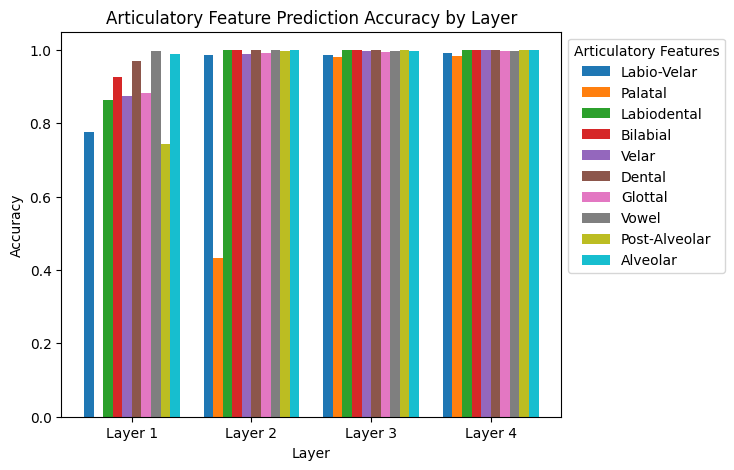

In [5]:
layer_accuracies = outputs

# 조음 특성 목록 (각 레이어의 key 순서에 따라 정렬되어야 함)
articulatory_features = ['Labio-Velar', 'Palatal', 
    'Labiodental', 'Bilabial', 'Velar', 'Dental', 
    'Glottal', 'Vowel', 'Post-Alveolar', 'Alveolar']

# 각 레이어별로 데이터 추출
data_per_feature = {feature: [] for feature in articulatory_features}
for layer_accuracy in layer_accuracies:
    for feature in articulatory_features:
        data_per_feature[feature].append(layer_accuracy[feature].item())  # np.array로 저장된 값을 float으로 변환

# 각 조음 특성별로 성능 비교
num_layers = len(layer_accuracies)
index = np.arange(num_layers)
bar_width = 0.08  # 바의 너비

fig, ax = plt.subplots(figsize=(8, 5))
for i, (feature, data) in enumerate(data_per_feature.items()):
    ax.bar(index + i*bar_width, data, bar_width, label=feature)

ax.set_xlabel('Layer')
ax.set_ylabel('Accuracy')
ax.set_title('Articulatory Feature Prediction Accuracy by Layer')
ax.set_xticks(index + bar_width / 2 * (len(articulatory_features) - 1))
ax.set_xticklabels([f'Layer {i+1}' for i in range(num_layers)])
# ax.legend()

# 범례를 오른쪽으로 이동
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Articulatory Features')

# 차트의 오른쪽 여백을 범례에 맞게 조정
plt.subplots_adjust(right=0.75)

plt.show()

In [6]:
outputs = []
for n in range(1, 31):
    output = np.load(f'../../../logs/probe_tacotron2_articulatory_features/scores/probe_selected_{n}.npz')
    outputs.append(dict(output))

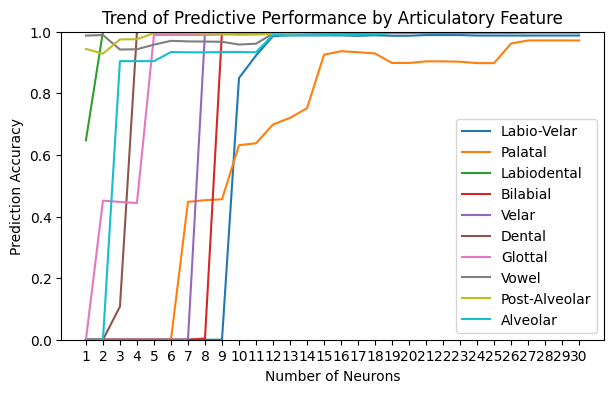

In [7]:
results = outputs

# Extract performance values for overall and for each feature
# overall_performance = [result['__OVERALL__'] for result in results]
# 조음 특성 목록 (각 레이어의 key 순서에 따라 정렬되어야 함)
articulatory_features = ['Labio-Velar', 'Palatal', 
    'Labiodental', 'Bilabial', 'Velar', 'Dental', 
    'Glottal', 'Vowel', 'Post-Alveolar', 'Alveolar']
performance_by_feature = {feature: [result[feature] for result in results] for feature in articulatory_features}


# 전체 성능과 각 특성에 대해 한 개의 그래프에 그립니다
fig, ax = plt.subplots(figsize=(7, 4))

# 전체 성능을 그래프로 그립니다 (선택적)
# ax.plot(['Top 5', 'Top 10', 'Top 15', 'Top 20', 'Top 25', 'Top30'], overall_performance, marker='o', label='__OVERALL__', linewidth=2, linestyle='--')

# 각 특성에 대한 성능을 그래프로 그립니다
for feature, performance in performance_by_feature.items():
    # ax.plot([f'Top {i + 1}' for i in range(len(performance_by_feature['Labio-Velar']))], performance, label=feature)
    ax.plot([f'{i + 1}' for i in range(len(performance_by_feature['Labio-Velar']))], performance, label=feature)
    
# 범례를 추가합니다
ax.legend()

# 제목과 축 레이블을 설정합니다
ax.set_title('Trend of Predictive Performance by Articulatory Feature')
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Prediction Accuracy')

# y축의 범위를 설정합니다
ax.set_ylim([0, 1])

# 그래프를 표시합니다
plt.show()
